In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from sklearn import metrics

In [2]:
PATH = "data/dog-breed-identification/"
sz=299
arch=resnext101_64
bs=58

In [3]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [4]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test' ,tfms=tfms, 
                                    bs=bs, val_idxs=val_idxs, suffix='.jpg')
    return data if sz>300 else data.resize(340, 'tmp')

In [5]:
torch.backends.cudnn.enabled;torch.cuda.is_available()

True

In [6]:
data = get_data(sz, bs) #data generator for batch size=64, image size=64x64
model = ConvLearner.pretrained(arch, data)
model.load('img_sz_299_resnext101_64_wo_unfreeze_cycle_1_2_eta_1e-2_date_2018-05-20 14:27:16.434806')

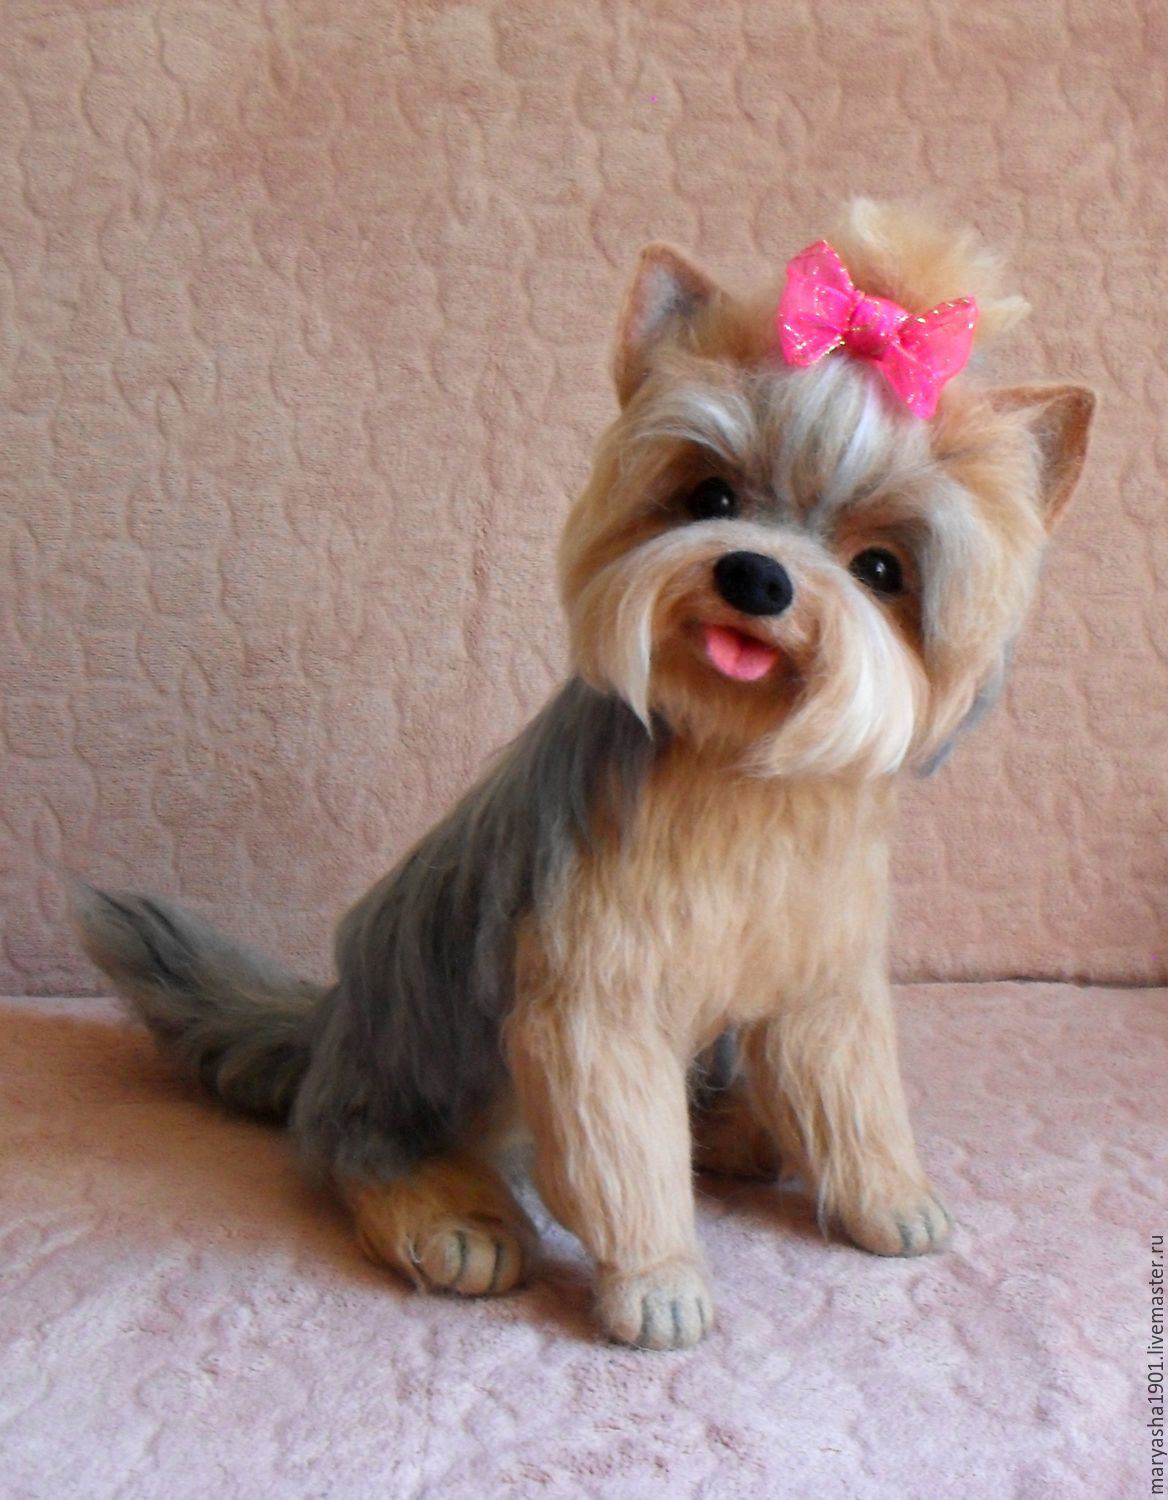

In [56]:
fn = 'data/dog-breed-identification/workshir.jpg'
img = PIL.Image.open(fn); img

In [57]:
trn_tfms, val_tfrms = tfms_from_model(arch, sz)
img = trn_tfms(open_image(fn))

In [58]:
preds = model.predict_array(img[None])

In [59]:
print(data.classes[np.argmax(np.exp(preds))])

yorkshire_terrier


In [51]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',
